In [1]:
import pandas as pd
import matplotlib.pyplot as plt
marathon_2015_2017 = pd.read_csv('./material/marathon_2015_2017.csv')
runner_1860 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(18,60))]
runner_1860_counting = runner_1860['Age'].value_counts()

# Age 별로 정렬하기 위한 데이터 프레임 생성
runner_age = pd.DataFrame({
    'Age': runner_1860_counting.index,
    'Count': runner_1860_counting
})

runner_age

C:\Users\ysn65\anaconda3\envs\init_dn\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age,Count
45,45,3236
46,46,3039
40,40,2734
47,47,2566
50,50,2498
41,41,2494
35,35,2327
42,42,2318
48,48,2277
43,43,2265


<ipython-input-4-1e9cc60b4e28>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x  in ranges])


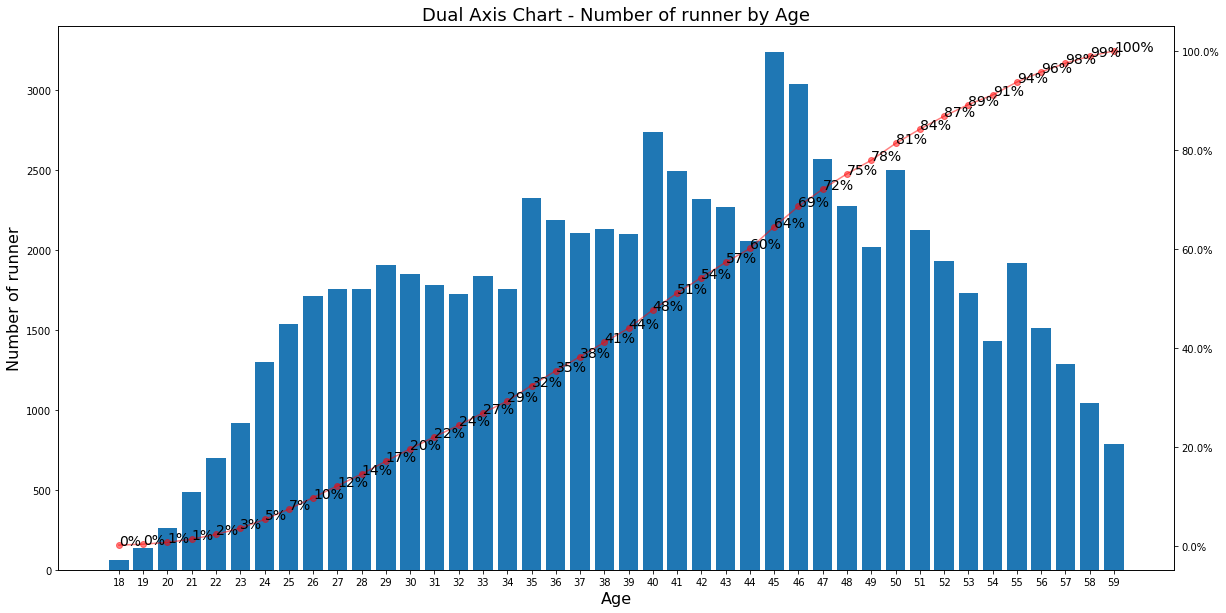

In [4]:
runner_age_sort = runner_age.sort_values(by=['Age'])
x = runner_age_sort.index
x = [str(i) for i in x]
y = runner_age_sort['Count']
# sum() cumsum()은 DataFrame에서 동작
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

# DataFrame --> List
y_ratio = [i for i in ratio_sum]


fig, barChart = plt.subplots(figsize=(20,10))
barChart.bar(x,y)
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)

ranges = lineChart.get_yticks()
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x  in ranges])
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], y_ratio[i]), fontsize=14)
    
barChart.set_xlabel('Age', fontdict = {'size':16})
barChart.set_ylabel('Number of runner', fontdict = {'size':16})
plt.title('Dual Axis Chart - Number of runner by Age', fontsize=18)
plt.show()